# MNIST - CNN

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.genfromtxt('train.csv', delimiter=',',skip_header=1)
data.shape

(42000, 785)

In [54]:
# normalize X
X = data[:,1:]/255
# one hot encode y
y = np.zeros(shape=(len(y),10),dtype=int)
y[np.arange(len(data)),data[:,0].astype(int)] = 1

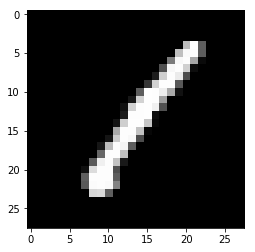

(1, array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]))

In [57]:
# sample image
plt.imshow(X[0].reshape(28,28),cmap='gray')
plt.show()
np.argmax(y[0]),y[0]

In [58]:
# train/test split
mask = np.zeros(shape=len(X),dtype=bool)
mask[np.random.choice(np.arange(len(X)),size=int(0.8*len(X)),replace=False)] = 1
X_train = X[mask]
X_test = X[~mask]
y_train = y[mask]
y_test = y[~mask]

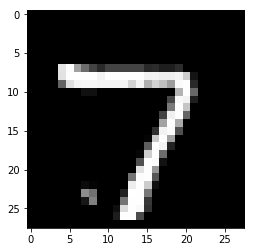

(7, array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]))

In [62]:
# double check split
i = np.random.randint(len(X_test))
plt.imshow(X_test[i].reshape(28,28),cmap='gray')
plt.show()
np.argmax(y_test[i]),y_test[i]

In [66]:
# check balance
np.unique(np.argmax(y_train,axis=1),return_counts=True)[1]

array([3291, 3750, 3350, 3491, 3205, 3088, 3332, 3518, 3226, 3349])

In [67]:
np.unique(np.argmax(y_test,axis=1),return_counts=True)[1]

array([841, 934, 827, 860, 867, 707, 805, 883, 837, 839])

### CNN model

In [68]:
from keras.models import Model
from keras.layers import Input, Dense, Convolution2D, Flatten, MaxPooling2D, Dropout

In [69]:
input_layer = Input(shape=(28,28,1))
conv1 = Convolution2D(16, kernel_size=3,activation='relu')(input_layer)
conv2 = Convolution2D(32, kernel_size=3,activation='relu')(conv1)
pool = MaxPooling2D()(conv2)
hidden = Dense(128,activation='relu')(Flatten()(pool))
drop = Dropout(rate=0.5)(hidden)
output = Dense(10, activation='softmax')(drop)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

### Training

In [70]:
model.fit(X_train.reshape(-1,28,28,1),y_train,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
33600/33600 [==============================] - 32s 962us/step - loss: 0.0457 - acc: 0.9841
Epoch 2/10
33600/33600 [==============================] - 32s 952us/step - loss: 0.0183 - acc: 0.9940
Epoch 3/10
33600/33600 [==============================] - 33s 990us/step - loss: 0.0132 - acc: 0.9955
Epoch 4/10
33600/33600 [==============================] - 34s 1ms/step - loss: 0.0103 - acc: 0.9966
Epoch 5/10
33600/33600 [==============================] - 33s 977us/step - loss: 0.0089 - acc: 0.9971
Epoch 6/10
33600/33600 [==============================] - 31s 920us/step - loss: 0.0077 - acc: 0.9972
Epoch 7/10
33600/33600 [==============================] - 32s 952us/step - loss: 0.0072 - acc: 0.9977
Epoch 8/10
33600/33600 [==============================] - 33s 990us/step - loss: 0.0062 - acc: 0.9978
Epoch 9/10
33600/33600 [==============================] - 34s 1ms/step - loss: 0.0054 - acc: 0.9983
Epoch 10/10
33600/33600 [=============

### Scoring

In [72]:
model.evaluate(X_train.reshape(-1,28,28,1),y_train)

33600/33600 [==============================] - 10s 296us/step


[0.000854877224299701, 0.9997797611213866]

In [73]:
model.evaluate(X_test.reshape(-1,28,28,1),y_test)

8400/8400 [==============================] - 2s 288us/step


[0.009633294943101169, 0.9975952339172364]

### Prepare submission

In [75]:
submit = np.genfromtxt('test.csv', delimiter=',',skip_header=1)

In [76]:
submit.shape

(28000, 784)

In [77]:
# normalize
X_s = submit/255

In [78]:
pred = model.predict(X_s.reshape(-1,28,28,1))

In [79]:
pred = np.argmax(pred,axis=1)

In [80]:
pred

array([2, 0, 9, ..., 3, 9, 2])

In [81]:
import pandas as pd

In [82]:
s = pd.read_csv('sample_submission.csv',index_col=0)
s.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [84]:
s['Label'] = pred
s.to_csv('cnn_submit.csv')